In [1]:
from model import Net
from utils import get_dst_device, print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
              ReLU-3           [-1, 16, 26, 26]               0
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]           1,450
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 16, 10, 10]           1,456
      BatchNorm2d-11           [-1, 16, 10, 10]              32
             ReLU-12           [-1, 16, 10, 10]               0
          Dropout-13           [-1, 16, 10, 10]               0
           Conv2d-14             [-1, 1

Batch Size torch.Size([128, 1, 28, 28])


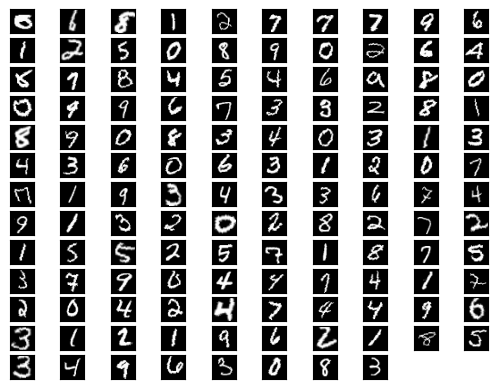

In [2]:
from utils import setup_test_loader, setup_train_loader, plot_data
train_loader = setup_train_loader("../data")
test_loader = setup_test_loader("../data")
plot_data(train_loader)

In [3]:
import torch.optim as optim
import torch.nn.functional as F
from utils import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1725 Batch_id=468 Accuracy=81.78: 100%|██████████| 469/469 [00:40<00:00, 11.59it/s]

[91.87911531318589, 94.6751705725304, 80.16112789526687, 75.24058065568423, 82.7969873331051, 76.84928979893009, 79.85806015545792, 86.08140462889067, 77.61066484361648, 70.4824340225248]


Test set: Average loss: 0.0657, Accuracy: 9811/10000 (98.11%)

[98.67346938775509, 98.6784140969163, 97.57751937984496, 98.8118811881188, 98.26883910386965, 98.20627802690582, 97.91231732776617, 98.54085603112841, 97.84394250513347, 96.53121902874133]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0441 Batch_id=468 Accuracy=96.47: 100%|██████████| 469/469 [00:40<00:00, 11.66it/s]

[98.00776633462772, 98.4870958172649, 95.46827794561933, 95.92236176806394, 96.08010955152345, 96.49511160302528, 97.71882392700236, 95.94573024740623, 95.43667749102718, 94.95713565305093]


Test set: Average loss: 0.0430, Accuracy: 9851/10000 (98.51%)

[99.38775510204081, 98.94273127753304, 97.77131782945736, 99.00990099009901, 97.5560081466395, 98.76681614349776, 97.80793319415449, 99.0272373540856, 99.07597535934292, 97.7205153617443]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0597 Batch_id=468 Accuracy=97.26: 100%|██████████| 469/469 [00:40<00:00, 11.57it/s]

[98.3623163937194, 98.60575496885198, 96.71030547163477, 97.1619637905725, 96.97021567956179, 97.17764250138352, 97.95539033457248, 97.06304868316042, 96.22286788583149, 96.2178517397882]


Test set: Average loss: 0.0379, Accuracy: 9879/10000 (98.79%)

[99.59183673469387, 99.20704845814979, 97.28682170542635, 99.00990099009901, 98.26883910386965, 98.99103139013454, 98.74739039665971, 99.61089494163424, 98.35728952772074, 98.81070366699703]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0254 Batch_id=468 Accuracy=97.56: 100%|██████████| 469/469 [00:40<00:00, 11.46it/s]

[98.64933310822218, 98.69474933254227, 96.82779456193353, 97.50448540205512, 97.17562478603217, 97.47279099797086, 98.29334234538696, 97.14285714285714, 97.00905828063578, 96.7221381744831]


Test set: Average loss: 0.0314, Accuracy: 9892/10000 (98.92%)

[99.89795918367346, 99.73568281938327, 97.86821705426357, 99.10891089108911, 98.37067209775967, 98.20627802690582, 98.43423799582463, 99.61089494163424, 98.76796714579056, 99.00891972249752]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.2550 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:40<00:00, 11.62it/s]

[98.76751646125274, 98.91723524176803, 97.39845585767036, 97.79807535475452, 97.75761725436494, 97.3621103117506, 98.52990875295708, 97.39824421388667, 96.872329516322, 96.55404269625147]


Test set: Average loss: 0.0320, Accuracy: 9896/10000 (98.96%)

[99.6938775510204, 99.29515418502203, 99.6124031007752, 98.7128712871287, 98.4725050916497, 99.2152466367713, 98.01670146137788, 99.12451361867704, 98.4599589322382, 98.90981169474728]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1088 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:40<00:00, 11.55it/s]

[98.91946648657775, 99.00622960545832, 97.49916079221215, 97.7491436959713, 97.77473467990414, 97.84172661870504, 98.34403514700912, 97.84517158818835, 97.3679712869595, 97.20961506135485]


Test set: Average loss: 0.0281, Accuracy: 9918/10000 (99.18%)

[99.79591836734694, 98.94273127753304, 99.70930232558139, 99.4059405940594, 99.38900203665987, 98.4304932735426, 98.53862212943632, 99.12451361867704, 98.97330595482546, 99.40535183349851]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0581 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:40<00:00, 11.68it/s]

[98.9532331588722, 98.90240284781964, 97.39845585767036, 98.12428641330942, 97.91167408421774, 97.84172661870504, 98.44542075025346, 97.90901835594573, 97.84652196205776, 97.1423768700622]


Test set: Average loss: 0.0289, Accuracy: 9905/10000 (99.05%)

[99.6938775510204, 99.55947136563876, 98.83720930232558, 98.7128712871287, 98.77800407331976, 99.10313901345292, 98.8517745302714, 99.70817120622569, 98.4599589322382, 98.71159563924678]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0221 Batch_id=468 Accuracy=98.15: 100%|██████████| 469/469 [00:40<00:00, 11.66it/s]

[99.00388316731387, 98.99139721150993, 97.86841221886539, 98.27108138965912, 97.94590893529613, 98.08153477218225, 98.73267995944576, 97.6855546687949, 97.67561100666553, 97.17599596570852]


Test set: Average loss: 0.0230, Accuracy: 9925/10000 (99.25%)

[99.79591836734694, 99.64757709251101, 99.8062015503876, 99.5049504950495, 98.87983706720978, 99.10313901345292, 98.32985386221294, 99.12451361867704, 98.870636550308, 99.30624380574827]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0338 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:40<00:00, 11.62it/s]

[99.1051831841972, 99.18421833283892, 97.98590130916415, 98.22214973087587, 98.13420061622732, 97.970854085962, 98.74957755998648, 98.16440542697525, 97.79524867544009, 97.22642460917801]


Test set: Average loss: 0.0249, Accuracy: 9915/10000 (99.15%)

[99.89795918367346, 99.55947136563876, 98.93410852713178, 99.3069306930693, 98.4725050916497, 98.65470852017937, 98.8517745302714, 99.5136186770428, 99.07597535934292, 99.10802775024777]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0520 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:40<00:00, 11.61it/s]

[99.08829984804997, 98.97656481756155, 98.17052702249077, 98.10797586038167, 98.06573091407053, 98.00774764803542, 98.64819195674214, 98.35594573024741, 97.50470005127329, 97.47856782652546]


Test set: Average loss: 0.0234, Accuracy: 9927/10000 (99.27%)

[99.59183673469387, 99.55947136563876, 99.8062015503876, 99.70297029702971, 99.18533604887983, 98.54260089686099, 98.74739039665971, 99.31906614785993, 99.17864476386036, 98.90981169474728]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1030 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:40<00:00, 11.68it/s]

[99.17271652878608, 99.27321269652923, 97.75092312856664, 98.22214973087587, 98.08284833960971, 98.11842833425567, 98.93545116593444, 98.0367118914605, 97.91488634421466, 97.42813918305598]


Test set: Average loss: 0.0228, Accuracy: 9926/10000 (99.26%)

[99.6938775510204, 99.82378854625551, 99.4186046511628, 99.70297029702971, 99.08350305498982, 98.54260089686099, 98.74739039665971, 99.41634241245137, 98.66529774127311, 99.30624380574827]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0381 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:39<00:00, 11.73it/s]

[99.22336653722775, 99.22871551468407, 97.98590130916415, 98.54836078943077, 97.94590893529613, 98.1553218963291, 98.68198715782358, 98.16440542697525, 98.11997949068535, 97.66347285258027]


Test set: Average loss: 0.0202, Accuracy: 9932/10000 (99.32%)

[99.59183673469387, 99.55947136563876, 99.8062015503876, 99.60396039603961, 99.18533604887983, 98.65470852017937, 98.95615866388309, 99.12451361867704, 99.28131416837782, 99.30624380574827]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0504 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:39<00:00, 11.85it/s]

[99.07141651190275, 99.110056363097, 98.22087948976167, 98.48311857771978, 98.18555289284492, 98.30289614462276, 98.93545116593444, 98.24421388667199, 98.11997949068535, 97.86518742645823]


Test set: Average loss: 0.0205, Accuracy: 9932/10000 (99.32%)

[99.79591836734694, 99.73568281938327, 99.6124031007752, 98.91089108910892, 99.18533604887983, 99.2152466367713, 99.16492693110646, 99.0272373540856, 99.17864476386036, 99.30624380574827]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0380 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:39<00:00, 11.81it/s]

[99.27401654566943, 99.13972115099378, 98.18731117824774, 98.46680802479204, 98.28825744608011, 98.1553218963291, 98.86786076377155, 98.41979249800478, 97.82943086651854, 97.71390149604976]


Test set: Average loss: 0.0191, Accuracy: 9937/10000 (99.37%)

[99.79591836734694, 99.82378854625551, 99.70930232558139, 99.3069306930693, 99.4908350305499, 99.2152466367713, 98.74739039665971, 99.31906614785993, 99.38398357289527, 98.81070366699703]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0380 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:39<00:00, 11.82it/s]

[99.2571332095222, 99.21388312073569, 98.32158442430345, 98.58098189528624, 98.3567271482369, 98.22910902047593, 98.85096316323082, 98.24421388667199, 98.08579729960691, 97.56261556564128]


Test set: Average loss: 0.0220, Accuracy: 9931/10000 (99.31%)

[99.79591836734694, 99.91189427312776, 99.32170542635659, 99.5049504950495, 98.87983706720978, 98.87892376681614, 99.16492693110646, 99.41634241245137, 99.07597535934292, 99.00891972249752]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0313 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:39<00:00, 11.83it/s]

[99.2571332095222, 99.43636902996144, 98.53977844914401, 98.59729244821399, 98.4936665525505, 98.28444936358606, 98.9861439675566, 98.43575418994413, 98.06870620406768, 97.79794923516558]


Test set: Average loss: 0.0179, Accuracy: 9940/10000 (99.40%)

[99.79591836734694, 99.82378854625551, 99.70930232558139, 99.5049504950495, 99.18533604887983, 98.76681614349776, 99.06054279749478, 99.31906614785993, 99.48665297741273, 99.20713577799802]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0161 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:39<00:00, 11.83it/s]

[99.42596657099443, 99.36220706021952, 98.35515273581738, 98.77670853041917, 98.4423142759329, 98.35823648773288, 99.0537343697195, 98.48363926576216, 98.37634592377371, 98.05009245251303]


Test set: Average loss: 0.0176, Accuracy: 9944/10000 (99.44%)

[99.89795918367346, 99.82378854625551, 99.90310077519379, 99.4059405940594, 99.18533604887983, 98.99103139013454, 99.06054279749478, 99.22178988326849, 99.48665297741273, 99.30624380574827]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0581 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:40<00:00, 11.72it/s]

[99.30778321796387, 99.18421833283892, 98.33836858006042, 98.64622410699722, 98.4594317014721, 98.70872532743037, 99.17201757350456, 98.41979249800478, 98.51307468808751, 97.93242561775088]


Test set: Average loss: 0.0174, Accuracy: 9943/10000 (99.43%)

[99.89795918367346, 99.91189427312776, 99.8062015503876, 99.4059405940594, 99.18533604887983, 98.76681614349776, 98.8517745302714, 99.5136186770428, 99.58932238193019, 99.20713577799802]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0409 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:40<00:00, 11.58it/s]

[99.35843322640554, 99.40670424206466, 98.65726753944276, 98.72777687163595, 98.61348853132489, 98.61649142224682, 99.03683676917878, 98.57940941739824, 98.30798154161681, 98.0164733568667]


Test set: Average loss: 0.0171, Accuracy: 9941/10000 (99.41%)

[99.89795918367346, 99.82378854625551, 99.70930232558139, 99.4059405940594, 99.18533604887983, 98.76681614349776, 98.95615866388309, 99.5136186770428, 99.48665297741273, 99.20713577799802]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0655 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:40<00:00, 11.52it/s]

[99.4766165794361, 99.42153663601306, 98.52299429338704, 98.7440874245637, 98.4423142759329, 98.63493820328353, 99.13822237242312, 98.49960095770152, 98.59853016578363, 97.98285426122038]


Test set: Average loss: 0.0167, Accuracy: 9945/10000 (99.45%)

[99.79591836734694, 99.82378854625551, 99.8062015503876, 99.3069306930693, 99.38900203665987, 98.99103139013454, 98.95615866388309, 99.41634241245137, 99.69199178644764, 99.20713577799802]
Adjusting learning rate of group 0 to 1.0000e-03.
